In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("data/df_final.csv")
df.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen


In [3]:
df.shape

(1995, 7)

#  6. Haben mehr Frauen oder mehr Männer unsere Autos gekauft? 

Filtern nach Daten, die einen Preis > 0 haben um nur die Kunden zu berücksichtigen, die ein Auto gekauft haben

In [4]:
df_käufer = df[df["Preis"] > 0]
df_käufer

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


Anschließend wird die Anzahl der Frauen ( Geschlecht = 0) im Datensatz ausgezählt

In [5]:
df_käufer_w = df_käufer[df_käufer['Geschlecht']==0]

In [6]:
anzahl_kunden_w = df_käufer_w['Geschlecht'].count()

Danach wird die Anzahl der Männer ( Geschlecht = 1) im Datensatz ausgezählt

In [7]:
df_käufer_m = df_käufer[df_käufer['Geschlecht']==1]

In [27]:
anzahl_kunden_m = df_käufer_m['Geschlecht'].count()

Visualisierung der Ergebnisse

In [28]:
x = [anzahl_kunden_m, anzahl_kunden_w]
y = ['Anzahl männlicher Kunden', 'Anzahl weiblicher Kunden']

([<matplotlib.patches.Wedge at 0x1fa9dd8a410>,
 [Text(-0.4667705285969763, 0.9960548547310533, 'Anzahl männlicher Kunden'),
  Text(0.4667705285969762, -0.9960548547310533, 'Anzahl weiblicher Kunden')])

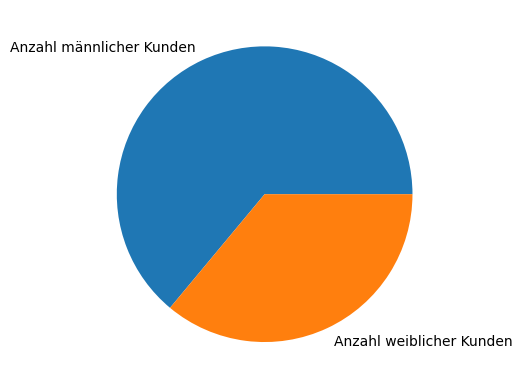

In [29]:
plt.pie(x, labels = y)

# 7. Wie hoch ist das Durchschnittsalter unserer Kunden? 

Zurückgreifen auf die Personen die einen Kauf getätigt haben (Kaufpreis > 0)

In [9]:
df_käufer["Alter"].mean().round(2)

50.38

# 8. Wie hoch ist das Durchschnittsalter der Besucher in unseren Showrooms? 


Zunächst werden die Besucher von den Käufern isoliert (Kaufpreis = 0)

In [10]:
df_besucher = df[df['Preis']==0]

Nun kann das Durchsnittsalter der Besucher errechnet werden:

In [11]:
df_besucher['Alter'].mean().round(2)

49.88

# 9. Was ist das Durchschnittsalter unserer männlichen Kunden?

In [12]:
df_käufer_m['Alter'].mean().round(2)

50.47

# 13. Wie viele Kunden haben keinen Kredit bei der Bank genommen, um das Auto zu kaufen? Die Kundenabteilung hat vergessen, diese Informationen zu sammeln. Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen, das höher als der Autopreis ist, keinen Bankkredit benötigten

Der dataframe wird so mainpuliert, dass nur die Datensätze enthalten bleiben, für die zutrifft, dass das Einkommen des Kunden größer als der gezahlte Preis des Autos ist. 

In [13]:
df_käufer_kein_kredit = df_käufer[df_käufer['Einkommen'] > df_käufer['Preis']]

In [14]:
df_käufer_kein_kredit

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
157,32,50330.0,49540.28,1.0,27.0,K0175,Bayern
407,34,24264.0,22580.44,1.0,19.0,K0859,Berlin
499,37,54403.0,53690.36,0.0,47.0,K0364,Brandenburg
642,32,30856.0,27934.83,1.0,18.0,K0447,Nordrhein-Westfalen
696,31,36296.0,35482.61,0.0,31.0,K0143,Nordrhein-Westfalen


In [15]:
df_käufer_kein_kredit['KundeNr'].count()

5

# 17. Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. Verwenden Sie die entsprechende Methode

Die Kaufwahrscheinlichkeit wird beeinflusst durch Folgende Faktoren: 

-Alter

-Geschlecht

-Einkommen

-Zeit

Diese bilden die unabhängigen Variablen, welche mit einer logistischen Regression auf den Einfluss auf die Kaufwahrscheinlichkeit geprüft werden sollen.

Zunächst wird die Spalte 'Gekauft' eingeführt, um zu messen ob der Kunde das Auto gekauft hat wobei 1 gekauft und 0 nicht gekauft bedeutet

In [16]:
df_gekauft = df[['Preis']]>0
df_gekauft

,Preis
0,True
1,True
2,True
3,True
4,True
...,...
1990,False
1991,False
1992,False
1993,False


In [17]:
df_gekauft.columns = ['Gekauft']
df_gekauft

,Gekauft
0,True
1,True
2,True
3,True
4,True
...,...
1990,False
1991,False
1992,False
1993,False


In [18]:
df_gekauft_int = df_gekauft[["Gekauft"]].astype(int)

In [19]:
df_gekauft_int

,Gekauft
0,1
1,1
2,1
3,1
4,1
...,...
1990,0
1991,0
1992,0
1993,0


In [20]:
df_linear_regression = pd.concat([df, df_gekauft_int], axis = 1)

Nun soll geprüft werden ob die neue Spalte richtig hinzugefügt wurde

In [21]:
df_linear_regression.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung,Gekauft
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern,1
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin,1
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg,1
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern,1
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen,1


Da nun alle benötigten Daten in dem Dataframe df_linear_regression vorhanden sind, kann die lineare Regressrion mit der Unabhängigen Variable 'Gekauft' und den unabhängigen Variablen 'Alter', 'Geschlecht', 'Einkommen' sowie 'Zeit' durchgeführt werden kann.

In [22]:
reg1 = smf.logit('Gekauft ~ Alter + Geschlecht + Einkommen + Zeit', data=df_linear_regression).fit()

Optimization terminated successfully.
         Current function value: 0.579019
         Iterations 6


In [23]:
print(reg1.summary())

                           Logit Regression Results                           
Dep. Variable:                Gekauft   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Mon, 01 Jan 2024   Pseudo R-squ.:                  0.1577
Time:                        17:30:27   Log-Likelihood:                -1155.1
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 2.522e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4436      0.263     -9.275      0.000      -2.960      -1.927
Alter          0.0181      0.007      2.638      0.008       0.005       0.032
Geschlecht     0.2464      0.103      2.393      0.0

# 18. Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?

In [24]:
from statsmodels.api import add_constant

Zunächst wird ein Datframe erzeugt, der die Ausprägungen der unabhängigen Variablen für die zwei zu prognostizierenden Fälle enthält. 

Index 0: 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat

Index 1: 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat

In [25]:
Prognose = pd.DataFrame({
    'Alter': [32, 51],           
    'Einkommen': [30000, 54000],
    'Geschlecht' : [1, 1],
    'Zeit' : [30, 45]
})
Prognose = add_constant(Prognose, has_constant='add')
Prognose

,const,Alter,Einkommen,Geschlecht,Zeit
0,1.0,32,30000,1,30
1,1.0,51,54000,1,45


Anschließend wird die Prognose durchgeführt: 

In [26]:
Prognostizierte_Wahrscheinlichkeiten = reg1.predict(Prognose)
print(Prognostizierte_Wahrscheinlichkeiten*100)

0    54.562119
1    74.039605
dtype: float64
